# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [47]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

In [48]:
cities_pd = pd.DataFrame()
cities_pd['City'] = cities
cities_pd['Lat'] = ""
cities_pd['Lng'] = ""
cities_pd['Max Temp'] = ""
cities_pd['Humidity'] = ""
cities_pd['Cloudiness'] = ""
cities_pd['Wind Speed'] = ""
cities_pd['Country'] = ""
cities_pd['Date'] = ""
cities_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,fortuna,,,,,,,,
1,geraldton,,,,,,,,
2,puerto ayora,,,,,,,,
3,saint-philippe,,,,,,,,
4,castro,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [73]:
# set up lists to hold reponse info

city = [] 
lat = []
lng = []
max_temp = []
humidity = []
cloudiness= []
wind_speed = []
country = []
date = []

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
api_key =  weather_api_key

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    try:
    
        response = requests.get(query_url + city).json()
        city.append(city)
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])

        print(f'City ' + city + ' completed' )
        
    except(KeyError, IndexError):
        
        print("City not found. Skipping...")
    

City fortuna completed
City geraldton completed
City puerto ayora completed
City saint-philippe completed
City castro completed
City abonnema completed
City not found. Skipping...
City tuktoyaktuk completed
City atasu completed
City punta arenas completed
City albany completed
City arraial do cabo completed
City longyearbyen completed
City bikin completed
City mataura completed
City kapaa completed
City namibe completed
City shimoda completed
City solnechnyy completed
City not found. Skipping...
City port elizabeth completed
City lebu completed
City metro completed
City kaitangata completed
City naze completed
City desbiens completed
City atuona completed
City bluff completed
City kodiak completed
City novochernorechenskiy completed
City ushuaia completed
City busselton completed
City sao jose da coroa grande completed
City pangnirtung completed
City kavieng completed
City lima completed
City barrow completed
City alta floresta completed
City hermanus completed
City bathsheba completed

City not found. Skipping...
City ishigaki completed
City cururupu completed
City high level completed
City henties bay completed
City kayerkan completed
City sakakah completed
City oparino completed
City iralaya completed
City misratah completed
City mirnyy completed
City ribas do rio pardo completed
City luderitz completed
City mugango completed
City saldanha completed
City bajil completed
City pozo colorado completed
City sawakin completed
City maniitsoq completed
City urusha completed
City yeppoon completed
City not found. Skipping...
City hirara completed
City nanortalik completed
City umm lajj completed
City richards bay completed
City port hedland completed
City not found. Skipping...
City upata completed
City nuuk completed
City nueva gerona completed
City wolbrom completed
City deori khas completed
City cherskiy completed
City pedernales completed
City couvin completed
City melfort completed
City moscow completed
City makaha completed
City atikokan completed
City megion complet

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [85]:
# Visualize to confirm airport data appears
cities_dict = ({"City":cities,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity" : humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country, 
    "Date": date
    })

cities_dict_df = pd.DataFrame.from_dict(dict, orient='index').transpose()
dict_df.head()

# Save Data to csv
cities_dict_df.to_csv("WeatherPy.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [96]:
cities_dict_df["Humidity"].max()

100

In [101]:
#  Get the indices of cities that have humidity over 100%.

hum_cities = cities_dict_df.loc[cities_dict_df['Humidity'] >= 100,:]
hum_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
31,busselton,66.1451,-65.7125,-1,100,90,4.12,CA,1619734757
59,port hueneme,-21.2,-175.2,24,100,90,3.09,TO,1619734768
78,carupano,42.097,-79.2353,11.67,100,90,3.09,US,1619734777
92,avarua,46.6166,10.7002,13,100,90,0.73,IT,1619734783
137,uzhur,-42.8794,147.329,12.22,100,75,4.12,AU,1619734753
139,lar gerd,-33.8667,121.9,14,100,90,6.69,AU,1619734807
182,sitka,-32.5943,149.587,9,100,0,1.68,AU,1619734827
210,shalakusha,-7.4706,-34.8086,24,100,75,3.09,BR,1619734840
229,waingapu,34.7333,135.583,15,100,75,0.51,JP,1619734850
245,lorengau,63.7506,-68.5145,0,100,90,2.06,CA,1619734857


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

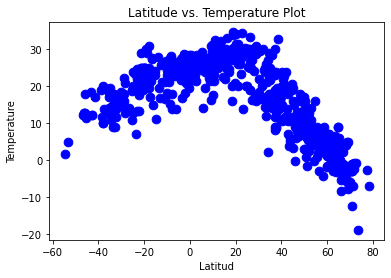

In [117]:
marker_size=15
plt.scatter(cities_dict_df['Lat'],cities_dict_df['Max Temp'],s=75, color="blue")
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitud")
plt.ylabel("Temperature")


plt.savefig("../Images/Latitude vs. Temperature Plot.png", bbox_inches = "tight")
plt.show()

## Latitude vs. Humidity Plot

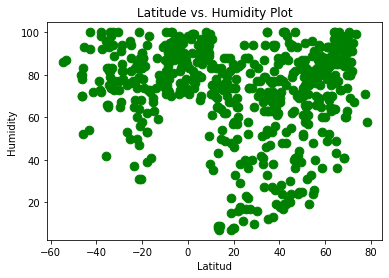

In [118]:
marker_size=15
plt.scatter(cities_dict_df['Lat'],cities_dict_df['Humidity'],s=75, color="green")
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitud")
plt.ylabel("Humidity")


plt.savefig("../Images/Latitude vs. Humidity Plot.png", bbox_inches = "tight")
plt.show()

## Latitude vs. Cloudiness Plot

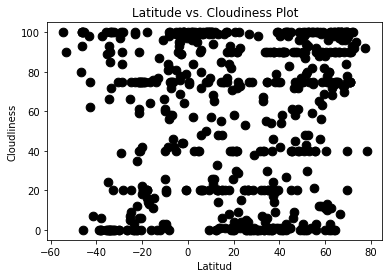

In [119]:
marker_size=15
plt.scatter(cities_dict_df['Lat'],cities_dict_df['Cloudiness'],s=75, color="black")
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitud")
plt.ylabel("Cloudliness")


plt.savefig("../Images/Latitude vs. Cloudliness.png", bbox_inches = "tight")
plt.show()

## Latitude vs. Wind Speed Plot

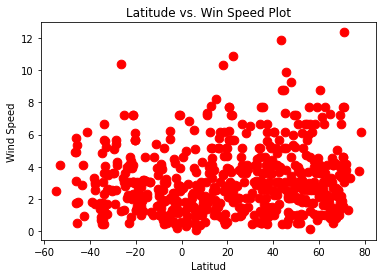

In [120]:
marker_size=15
plt.scatter(cities_dict_df['Lat'],cities_dict_df['Wind Speed'],s=75, color="red")
plt.title("Latitude vs. Win Speed Plot")
plt.xlabel("Latitud")
plt.ylabel("Wind Speed")


plt.savefig("../Images/Latitude vs. Wind Speed Plot.png", bbox_inches = "tight")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression